In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from scipy.stats.stats import ttest_ind
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox
from sqlalchemy import create_engine
import warnings
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from statistics import mean

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

perf_df = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

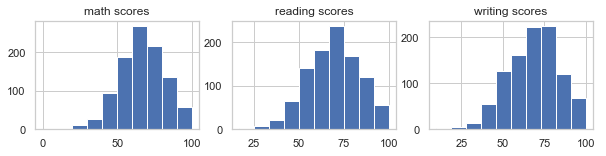

Math:
Jarque-Bera test statistics is 1233.4799726707836 and p value is 0.0
Normality test statistics is 259.4703560154713 and p value is 4.536574867826489e-57


Reading:
Jarque-Bera test statistics is 88.0083349548674 and p value is 0.0
Normality test statistics is 70.4238348783534 and p value is 5.101038001506264e-16


writing:
Jarque-Bera test statistics is 141.6378240717818 and p value is 0.0
Normality test statistics is 97.39700939472482 and p value is 7.087745794883206e-22




In [20]:
plt.figure(figsize=(10,2))

plt.subplot(1, 3, 1)
plt.hist(perf_df["math score"])
plt.title("math scores")

plt.subplot(1, 3, 2)
plt.hist(perf_df["reading score"])
plt.title("reading scores")

plt.subplot(1, 3, 3)
plt.hist(perf_df["writing score"])
plt.title("writing scores")
plt.show()

#test for normality
jb_stats = jarque_bera(np.sqrt(perf_df["math score"]))
norm_stats = normaltest(np.sqrt(perf_df["math score"]))
print("Math:")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))
print('\n')

jb_stats = jarque_bera(np.sqrt(perf_df["reading score"]))
norm_stats = normaltest(np.sqrt(perf_df["reading score"]))
print("Reading:")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))
print('\n')

jb_stats = jarque_bera(np.sqrt(perf_df["writing score"]))
norm_stats = normaltest(np.sqrt(perf_df["writing score"]))
print("writing:")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))
print('\n')


The p-values are 0 which indicates that the distribution of the log transformed variables is statistically different from the normal distribution. So I applied the Box-Cox transformation and reanalyzed the data:

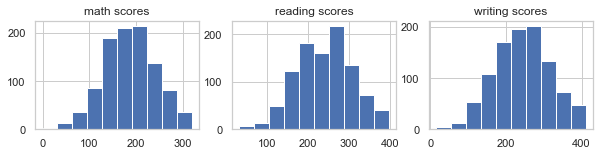

Math:
Jarque-Bera test statistics is 0.9589875596660145 and p value is 0.6190967117358159
Normality test statistics is 0.9034198455639313 and p value is 0.636538788347859


Reading:
Jarque-Bera test statistics is 4.119778575331906 and p value is 0.1274680814024559
Normality test statistics is 5.282274611852865 and p value is 0.07128015609575467


writing:
Jarque-Bera test statistics is 4.746478090040098 and p value is 0.09317842784055597
Normality test statistics is 6.267311355043339 and p value is 0.04355827085023795




In [38]:
#clean zero/negative values in math scores
positive_math = perf_df['math score'].clip_lower(1)

math_boxcox,_ = boxcox(positive_math)
reading_boxcox,_ = boxcox(perf_df["reading score"])
writing_boxcox,_ = boxcox(perf_df["writing score"])

#plot normalized values
plt.figure(figsize=(10,2))

plt.subplot(1, 3, 1)
plt.hist(math_boxcox)
plt.title("math scores")

plt.subplot(1, 3, 2)
plt.hist(reading_boxcox)
plt.title("reading scores")

plt.subplot(1, 3, 3)
plt.hist(writing_boxcox)
plt.title("writing scores")
plt.show()

#rerun normality tests
jb_stats = jarque_bera(math_boxcox)
norm_stats = normaltest(math_boxcox)
print("Math:")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))
print('\n')

jb_stats = jarque_bera(reading_boxcox)
norm_stats = normaltest(reading_boxcox)
print("Reading:")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))
print('\n')

jb_stats = jarque_bera(writing_boxcox)
norm_stats = normaltest(writing_boxcox)
print("writing:")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))
print('\n')


After the Box-Cox transformation the values are normally distributed.

2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

In [49]:
avg_score = (perf_df['math score'] + perf_df['reading score'] + perf_df['writing score']) / 3

jb_stats = jarque_bera(avg_score)
norm_stats = normaltest(avg_score)
print("Average:")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))
print('\n')

Average:
Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478




In [51]:
#p-values ~0, so apply Box-Cox:
avg_boxcox,_ = boxcox(avg_score)
jb_stats = jarque_bera(avg_boxcox)
norm_stats = normaltest(avg_boxcox)
print("Average:")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))
print('\n')


Average:
Jarque-Bera test statistics is 2.4353987431906026 and p value is 0.29591016374203183
Normality test statistics is 2.779857245981238 and p value is 0.2490930835165177




Data is now normally distributed after the Box-Cox transformation. 

3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

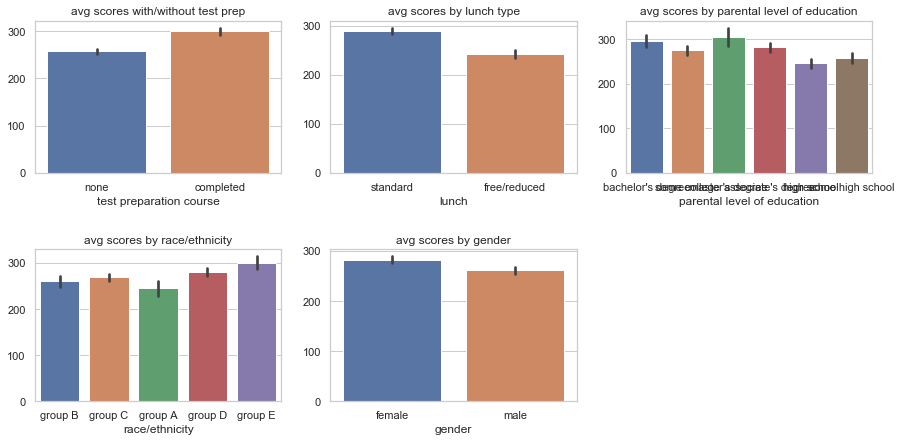

In [61]:
plt.figure(figsize=(15,7))
plt.subplots_adjust(hspace=0.5)

#test prep histogram
plt.subplot(2,3,1)
sns.barplot(perf_df["test preparation course"], avg_boxcox)
plt.title("avg scores with/without test prep")

#lunch histogram
plt.subplot(2,3,2)
sns.barplot(perf_df["lunch"], avg_boxcox)
plt.title("avg scores by lunch type")

#parent level of education
plt.subplot(2,3,3)
sns.barplot(perf_df["parental level of education"], avg_boxcox)
plt.title("avg scores by parental level of education")

#race/ethnicity
plt.subplot(2,3,4)
sns.barplot(perf_df["race/ethnicity"], avg_boxcox)
plt.title("avg scores by race/ethnicity")

plt.subplot(2,3,5)
sns.barplot(perf_df["gender"], avg_boxcox)
plt.title("avg scores by gender")

plt.show()

Students who completed the test prep course, get standard lunch, have parents with a bachelor's or master's degree, are from ethnic group E, or are female scored significantly better on average (using the Box-Cox transformed data). 